# Harmonic-percussive-residual source separation



In [1]:
from __future__ import print_function

In [2]:
import librosa
import IPython.display
import numpy as np
import librosa.display
import sys
try:
    sys.getwindowsversion()
except AttributeError:
    isWindows = False
else:
    isWindows = True

if isWindows:
    import win32api,win32process,win32con
    pid = win32api.GetCurrentProcessId()
    handle = win32api.OpenProcess(win32con.PROCESS_ALL_ACCESS, True, pid)
    win32process.SetPriorityClass(handle, win32process.HIGH_PRIORITY_CLASS)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Load the example track
y, sr = librosa.load('Audio/Are you That Somebody.mp3')

In [5]:
D = librosa.stft(y)

In [6]:
# Decompose D into harmonic and percussive components
D_harmonic, D_percussive = librosa.decompose.hpss(D)

C:\ProgramData\Anaconda3\lib\site-packages\librosa\core\spectrum.py:959: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(magphase(D)[0]) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


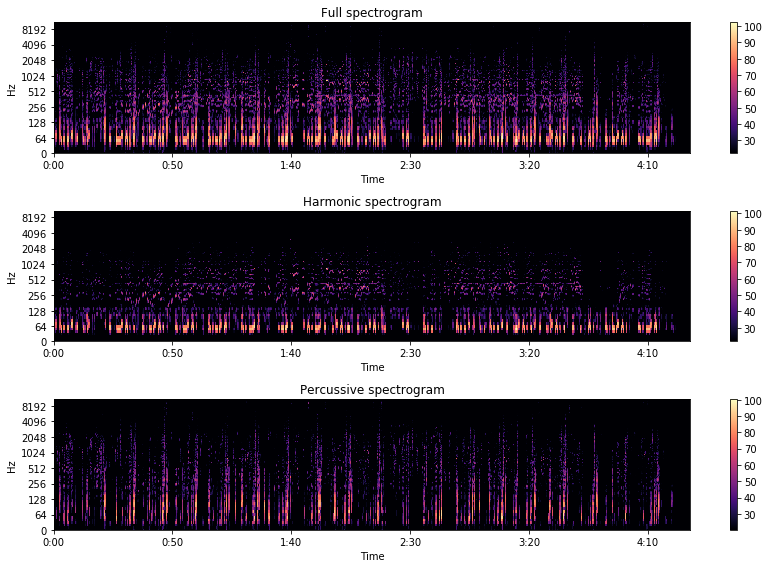

In [7]:
# Pre-compute a global reference power from the input spectrum
rp = np.max(np.abs(D))**2

plt.figure(figsize=(12, 8))
plt.subplot(3,1,1)
librosa.display.specshow(librosa.amplitude_to_db(D**2), y_axis='log', x_axis='time')
plt.colorbar()
plt.title('Full spectrogram')
plt.subplot(3,1,2)
librosa.display.specshow(librosa.amplitude_to_db(D_harmonic**2), y_axis='log', x_axis='time')
plt.colorbar()
plt.title('Harmonic spectrogram')
plt.subplot(3,1,3)
librosa.display.specshow(librosa.amplitude_to_db(D_percussive**2), y_axis='log', x_axis='time')
plt.colorbar()
plt.title('Percussive spectrogram')
plt.tight_layout()

In [8]:
# # We can make this stricter by using a larger margins.
# # The default (above) corresponds to margin=1

# D_harmonic2, D_percussive2 = librosa.decompose.hpss(D, margin=2)
# D_harmonic4, D_percussive4 = librosa.decompose.hpss(D, margin=4)
# D_harmonic8, D_percussive8 = librosa.decompose.hpss(D, margin=8)
# D_harmonic16, D_percussive16 = librosa.decompose.hpss(D, margin=16)

In [9]:
# plt.figure(figsize=(10, 10))

# plt.subplot(5,2,1)
# librosa.display.specshow(librosa.amplitude_to_db(D_harmonic**2, ref=rp), y_axis='log', x_axis='time')
# plt.title('Harmonic')
# plt.yticks([])
# plt.ylabel('margin=1')

# plt.subplot(5,2,2)
# librosa.display.specshow(librosa.amplitude_to_db(D_percussive**2, ref=rp), y_axis='log', x_axis='time')
# plt.title('Percussive')
# plt.yticks([]) ,plt.ylabel('')

# plt.subplot(5,2,3)
# librosa.display.specshow(librosa.amplitude_to_db(D_harmonic2**2, ref=rp), y_axis='log', x_axis='time')
# plt.yticks([])
# plt.ylabel('margin=2')

# plt.subplot(5,2,4)
# librosa.display.specshow(librosa.amplitude_to_db(D_percussive2**2, ref=rp), y_axis='log', x_axis='time')
# plt.yticks([]) ,plt.ylabel('')

# plt.subplot(5,2,5)
# librosa.display.specshow(librosa.amplitude_to_db(D_harmonic4**2, ref=rp), y_axis='log', x_axis='time')
# plt.yticks([])
# plt.ylabel('margin=4')

# plt.subplot(5,2,6)
# librosa.display.specshow(librosa.amplitude_to_db(D_percussive4**2, ref=rp), y_axis='log', x_axis='time')
# plt.yticks([]) ,plt.ylabel('')

# plt.subplot(5,2,7)
# librosa.display.specshow(librosa.amplitude_to_db(D_harmonic8**2, ref=rp), y_axis='log', x_axis='time')
# plt.yticks([])
# plt.ylabel('margin=8')

# plt.subplot(5,2,8)
# librosa.display.specshow(librosa.amplitude_to_db(D_percussive8**2, ref=rp), y_axis='log', x_axis='time')
# plt.yticks([]) ,plt.ylabel('')

# plt.subplot(5,2,9)
# librosa.display.specshow(librosa.amplitude_to_db(D_harmonic16**2, ref=rp), y_axis='log', x_axis='time')
# plt.yticks([])
# plt.ylabel('margin=16')

# plt.subplot(5,2,10)
# librosa.display.specshow(librosa.amplitude_to_db(D_percussive16**2, ref=rp), y_axis='log', x_axis='time')
# plt.yticks([]) ,plt.ylabel('')

# plt.tight_layout()

In [10]:
# from IPython.display import Audio

In [11]:
# Audio(data=y, rate=sr)

In [12]:
# Audio(data=librosa.istft(D_harmonic), rate=sr)

In [13]:
librosa.output.write_wav('Audio/Aaliyah_D_harmonic.wav', y=librosa.istft(D_harmonic), sr=sr)

In [14]:
# Audio(data=librosa.istft(D_percussive), rate=sr)

In [15]:
librosa.output.write_wav('Audio/Aaliyah_D_percussive.wav', y=librosa.istft(D_percussive), sr=sr)